# FRAGANCE SCORE: 
## MODELO PREDITIVO PARA AVALIAÇÃO DE PERFUMES

# Autores:
- Caio Cezar Veronezi Macedo, RA: 11050916, email: cezar.veronezi@aluno.ufabc.edu.br

## Imports

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

c:\Users\Caio\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


## Importação dos dados

In [3]:
url = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2024/2024-12-10/parfumo_data_clean.csv'

parfum = pd.read_csv(url)

parfum.head()

,Number,Name,Brand,Release_Year,Concentration,Rating_Value,Rating_Count,Main_Accords,Top_Notes,Middle_Notes,Base_Notes,Perfumers,URL
0,455,Tabac Écarlate,Le Ré Noir,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Valery Sokolov / Валерий Соколов,https://www.parfumo.com/Perfumes/Le_Re_Noir/45...
1,0071,Tidal Pool,CB I Hate Perfume,2004.0,NaN,NaN,NaN,NaN,Bergamot,French lavender,"Musk, Foulness",Harry Frémont,https://www.parfumo.com/Perfumes/CB_I_Hate_Per...
2,0154,Pumpkin Pie,CB I Hate Perfume,1998.0,NaN,NaN,NaN,"Green, Leathery, Chypre, Animal",NaN,NaN,NaN,NaN,https://www.parfumo.com/Perfumes/CB_I_Hate_Per...
3,0162,Wet Stone,CB I Hate Perfume,2006.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.parfumo.com/Perfumes/CB_I_Hate_Per...
4,0171,Chocolate Box,CB I Hate Perfume,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.parfumo.com/Perfumes/CB_I_Hate_Per...


In [4]:
parfum.columns

Index(['Number', 'Name', 'Brand', 'Release_Year', 'Concentration',
       'Rating_Value', 'Rating_Count', 'Main_Accords', 'Top_Notes',
       'Middle_Notes', 'Base_Notes', 'Perfumers', 'URL'],
      dtype='object')

In [3]:
parfum.count()

Number            1420
Name             59324
Brand            59324
Release_Year     39009
Concentration    12483
Rating_Value     30046
Rating_Count     30046
Main_Accords     32225
Top_Notes        31139
Middle_Notes     31149
Base_Notes       31154
Perfumers        20544
URL              59325
dtype: int64

## Introdução ao tema & descrição das variáveis do dataset selecionado

Os dados sobre perfumes incluem informações detalhadas sobre várias características de fragrâncias de diferentes marcas. Abaixo está uma breve descrição de cada variável:

1. **Number**: Identificador único ou número atribuído a cada perfume para diferenciá-los.
2. **Name**: Nome do perfume ou fragrância.
3. **Brand**: Marca ou fabricante responsável pela criação do perfume.
4. **Release_Year**: Ano de lançamento do perfume no mercado.
5. **Concentration**: Tipo de concentração da fragrância, como Eau de Parfum ou Eau de Toilette.
6. **Rating_Value**: A nota geral dada pelos usuários com base em sua avaliação do perfume.
7. **Rating_Count**: Número total de avaliações feitas pelos usuários sobre o perfume.
8. **Main_Accords**: Principais características olfativas ou acordes do perfume, como floral, amadeirado, frutado, etc.
9. **Top_Notes**: Notas iniciais da fragrância, que são percebidas logo após a aplicação.
10. **Middle_Notes**: Notas intermediárias ou "coração" da fragrância, que aparecem após a dissipação das notas iniciais.
11. **Base_Notes**: Notas finais e duradouras do perfume, que permanecem após a fragrância secar.
12. **Perfumers**: Criadores ou perfumistas responsáveis pela composição do perfume.
13. **URL**: Link para a página do produto no site Parfumo.com, onde os usuários podem obter mais informações sobre o perfume.

Essas variáveis ajudam a analisar e classificar os perfumes com base em suas características olfativas, avaliações dos usuários e informações de lançamento.

### Variáveis Contínuas:
- **Release_Year**
- **Rating_Count**

### Variáveis Categóricas:
- **Concentration**
- **Main_Accords**
- **Top_Notes**
- **Middle_Notes**
- **Base_Notes**
- **Perfumers**

### Variáveis de identificação (chaves):
- **Number**
- **Name**
- **Brand**
- **URL**

### TARGET (ALVO):
- **Rating_value**

In [5]:
categorical_cols = ['Concentration', 'Main_Accords', 'Top_Notes', 'Middle_Notes', 'Base_Notes']
id_cols = ['Number', 'Name', 'URL', 'Brand', 'Perfumers']
numeric_cols = ['Release_Year', 'Rating_Count']
target = 'Rating_Value'

## Análise exploratória

In [9]:
# Exibir informações gerais do dataset
parfum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59325 entries, 0 to 59324
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Number         1420 non-null   object 
 1   Name           59324 non-null  object 
 2   Brand          59324 non-null  object 
 3   Release_Year   39009 non-null  float64
 4   Concentration  12483 non-null  object 
 5   Rating_Value   30046 non-null  float64
 6   Rating_Count   30046 non-null  float64
 7   Main_Accords   32225 non-null  object 
 8   Top_Notes      31139 non-null  object 
 9   Middle_Notes   31149 non-null  object 
 10  Base_Notes     31154 non-null  object 
 11  Perfumers      20544 non-null  object 
 12  URL            59325 non-null  object 
dtypes: float64(3), object(10)
memory usage: 5.9+ MB


In [10]:
# Resumo estatístico das variáveis numéricas
print(parfum.describe())

       Release_Year  Rating_Value  Rating_Count
count  39009.000000  30046.000000  30046.000000
mean    2006.260043      7.347111     60.654929
std       22.879287      0.933537    118.187777
min     1709.000000      0.000000      2.000000
25%     2005.000000      6.900000      6.000000
50%     2013.000000      7.400000     19.000000
75%     2018.000000      7.900000     62.000000
max     2024.000000     10.000000   2732.000000


In [11]:
# Verificar valores ausentes
parfum.isnull().sum()

Number           57905
Name                 1
Brand                1
Release_Year     20316
Concentration    46842
Rating_Value     29279
Rating_Count     29279
Main_Accords     27100
Top_Notes        28186
Middle_Notes     28176
Base_Notes       28171
Perfumers        38781
URL                  0
dtype: int64

### Variáveis numéricas

c:\Users\Caio\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Caio\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Caio\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


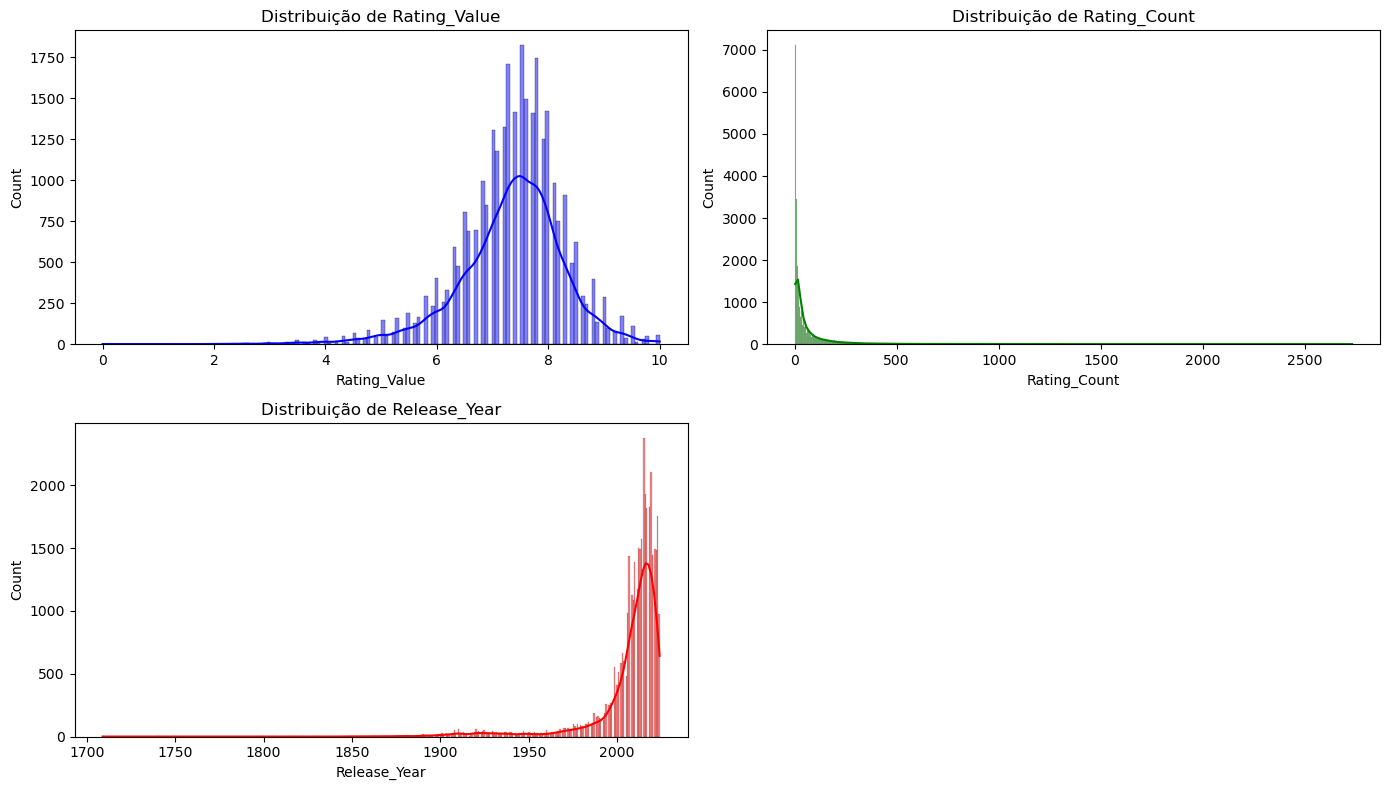

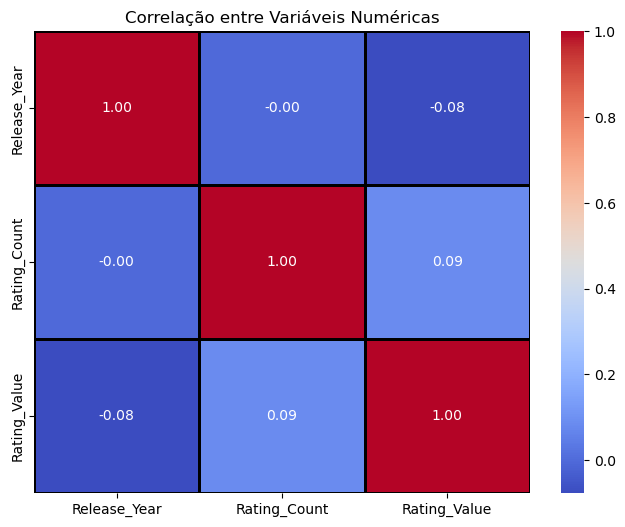

In [44]:
# Distribuição das variáveis numéricas (Rating_Value, Rating_Count, Release_Year)
plt.figure(figsize=(14, 8))

# Rating Value
plt.subplot(2, 2, 1)
sns.histplot(parfum['Rating_Value'], kde=True, color='blue')
plt.title('Distribuição de Rating_Value')

# Rating Count
plt.subplot(2, 2, 2)
sns.histplot(parfum['Rating_Count'], kde=True, color='green')
plt.title('Distribuição de Rating_Count')

# Release Year
plt.subplot(2, 2, 3)
sns.histplot(parfum['Release_Year'], kde=True, color='red')
plt.title('Distribuição de Release_Year')

plt.tight_layout()
plt.show()

# Correlação entre variáveis numéricas (Rating_Value, Rating_Count, Release_Year)
corr_matrix = parfum[numeric_cols + [target]].corr()


# Plotando a matriz de correlação
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=1, linecolor='black')
plt.title('Correlação entre Variáveis Numéricas')
plt.show()

### AS VARIÁVEIS NUMÉRICAS NÃO SÃO ÚTEIS PARA UM MODELO, TRATA-SE DE APENAS DADOS DE IDENTIFICAÇÃO (ANO) E CONTAGEM DE RATING

### Variáveis categóricas

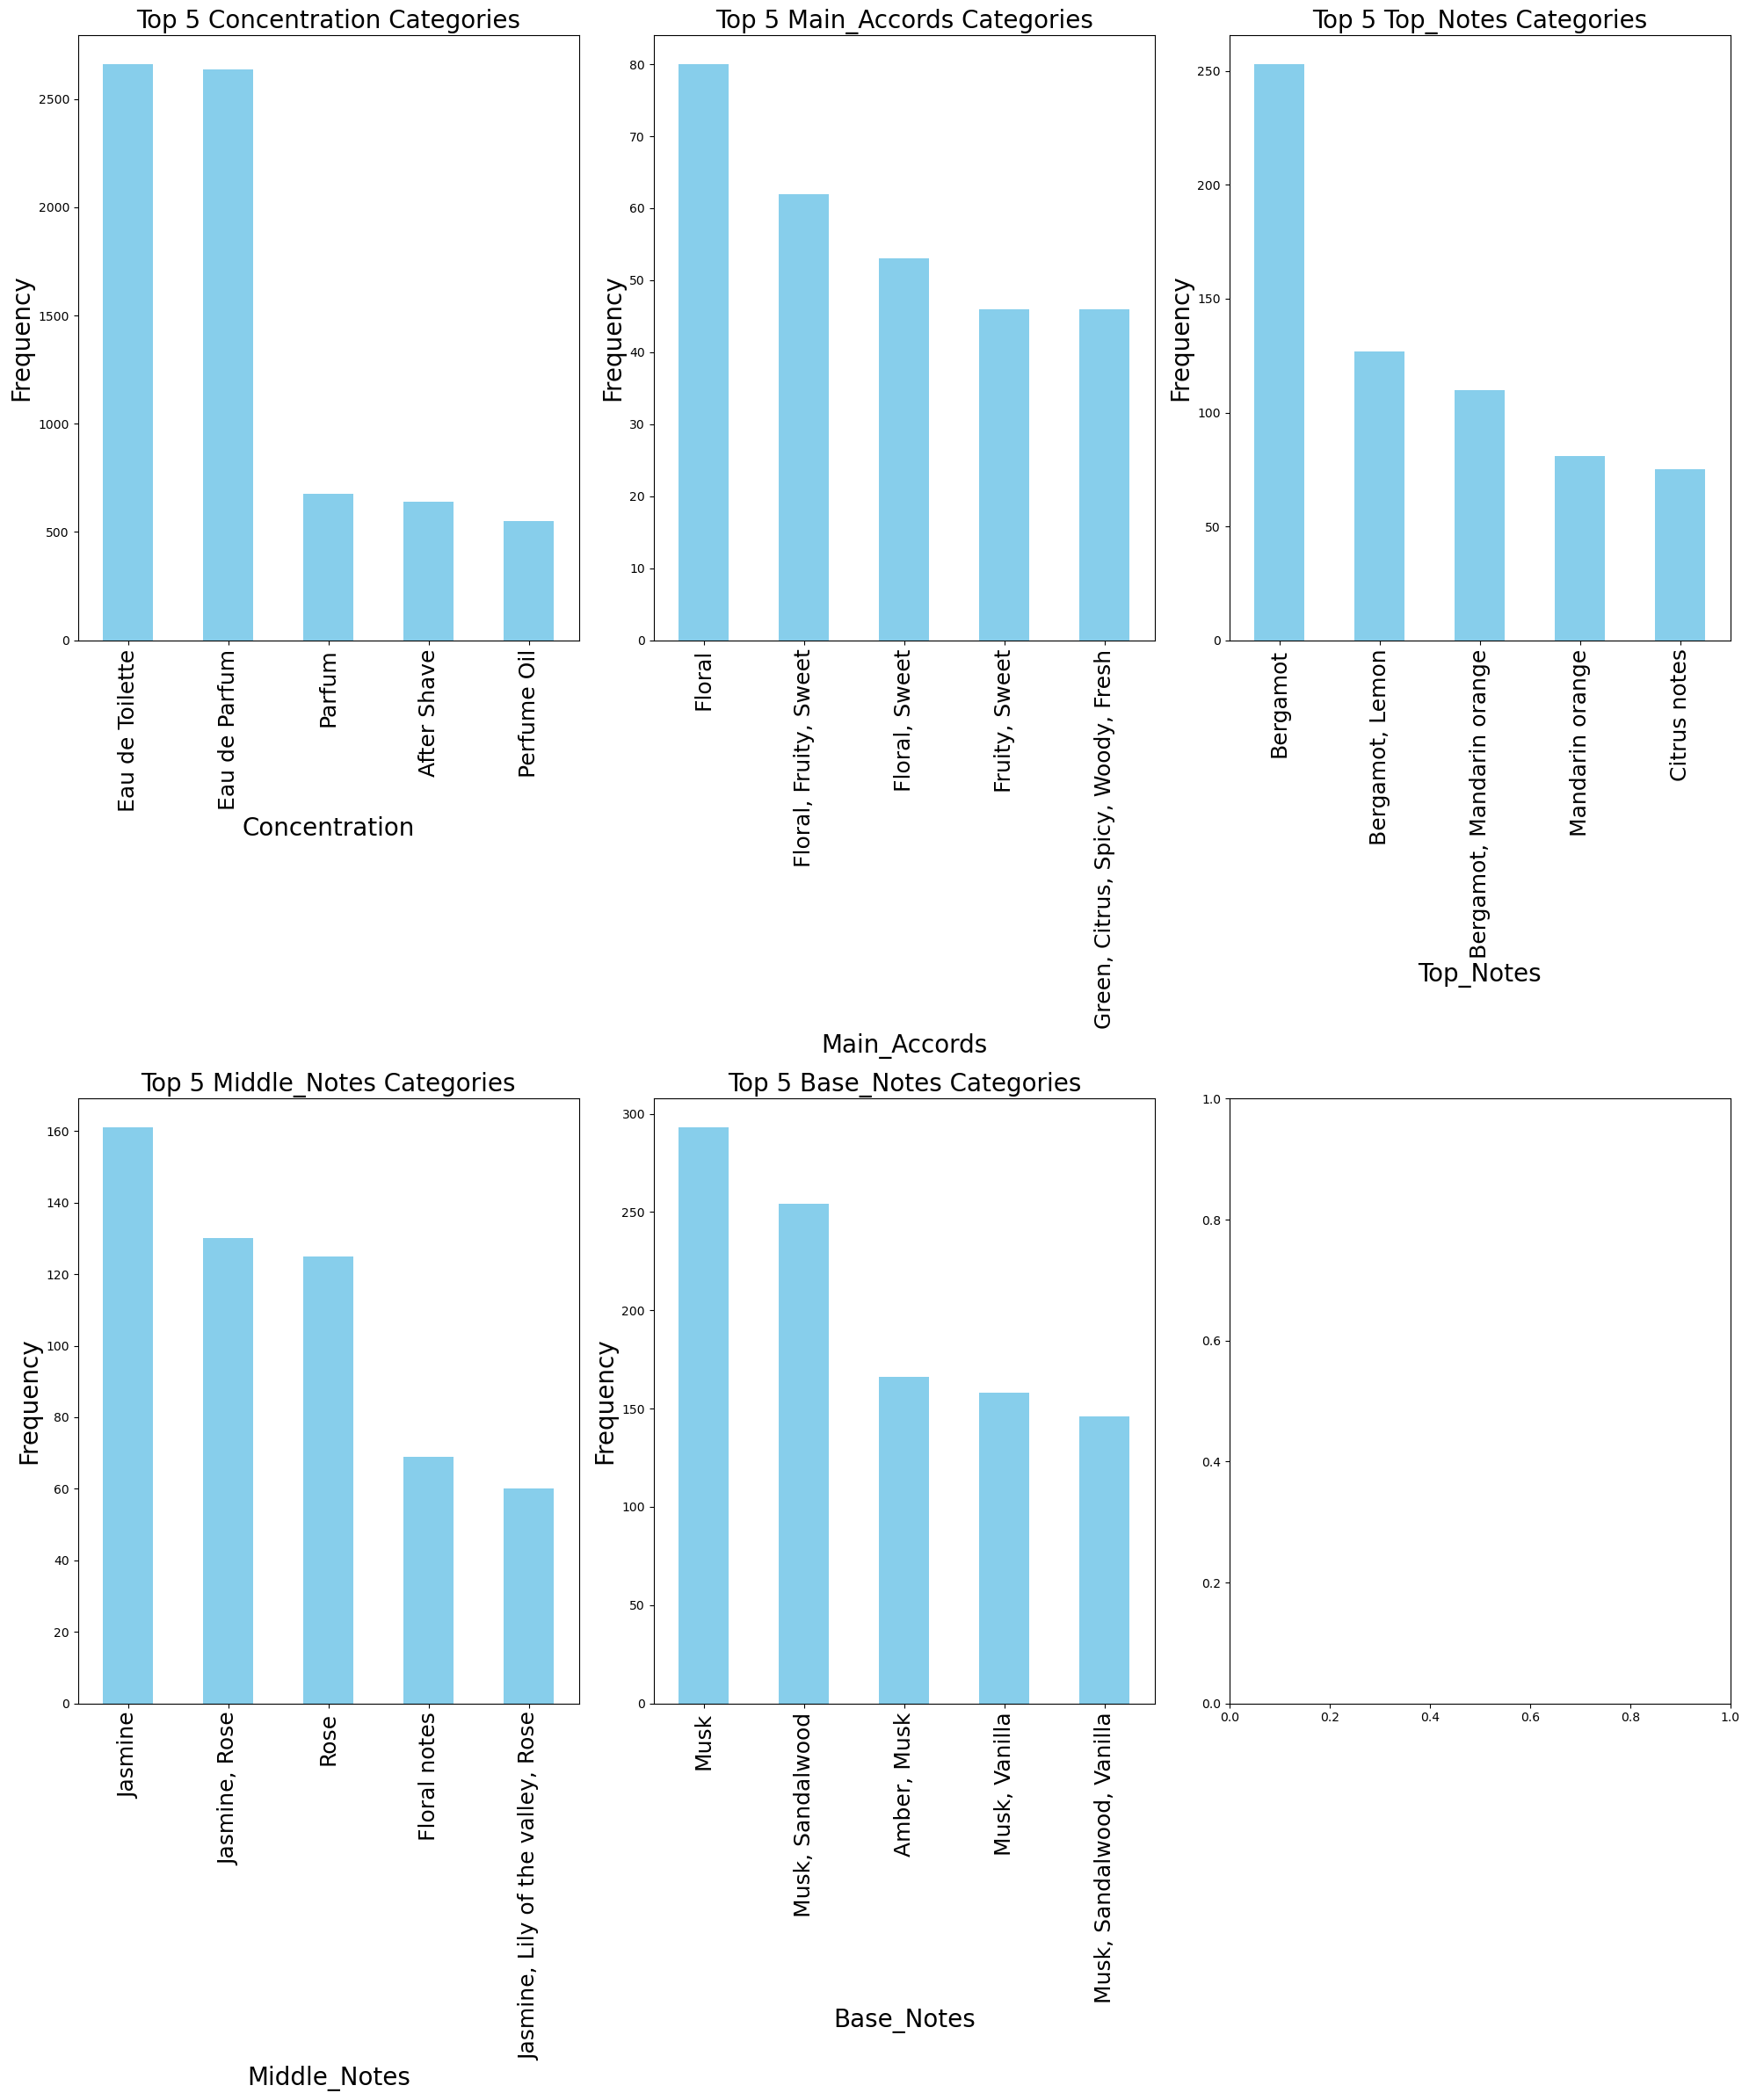

In [29]:
# Plot das top 5 categorias das variáveis categóricas
fig, axes = plt.subplots(2, 3, figsize=(20, 24))
axes = axes.flatten()

for idx, col in enumerate(categorical_cols):
    top_10 = parfum[col].value_counts().head(5)
    top_10.plot(kind='bar', ax=axes[idx], color='skyblue')
    axes[idx].set_title(f'Top 5 {col} Categories', fontsize = 20)
    axes[idx].set_xlabel(col, fontsize = 20)
    axes[idx].set_ylabel('Frequency', fontsize = 20)
    axes[idx].tick_params(axis='x', rotation=90, labelsize=18)  

plt.tight_layout()
plt.show()

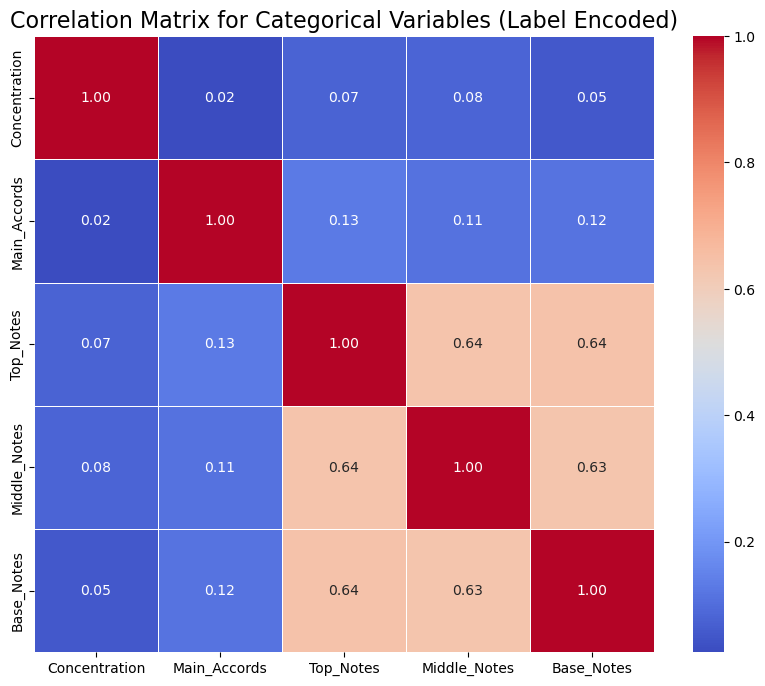

In [30]:
# Avaliando a correlação entre as variáveis categóricas
label_encoder = LabelEncoder()
encoded_data = parfum[categorical_cols].apply(label_encoder.fit_transform)
correlation_matrix = encoded_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix for Categorical Variables (Label Encoded)', fontsize=16)
plt.show()

## Tratamento de nulos

#### Avaliando a quantidade de nulos, se formos apenas dropar (dropna()) iremos perder muuuitos dados
#### Dessa forma, torna-se mais interessante utilizar imputação da moda e da média, para variáveis categóricas e numéricas, respectivamente

In [7]:
parfum[numeric_cols + [target]] = parfum[numeric_cols + [target]].fillna(parfum[numeric_cols + [target]].mean())

for col in categorical_cols:
    mode_value = parfum[col].mode()[0]  
    parfum[col] = parfum[col].fillna(mode_value)

print(parfum.isnull().sum())

Number           57905
Name                 1
Brand                1
Release_Year         0
Concentration        0
Rating_Value         0
Rating_Count         0
Main_Accords         0
Top_Notes            0
Middle_Notes         0
Base_Notes           0
Perfumers        38781
URL                  0
dtype: int64


In [8]:
parfum = parfum.drop(['Number', 'Perfumers'], axis=1).dropna()

parfum.count()

Name             59324
Brand            59324
Release_Year     59324
Concentration    59324
Rating_Value     59324
Rating_Count     59324
Main_Accords     59324
Top_Notes        59324
Middle_Notes     59324
Base_Notes       59324
URL              59324
dtype: int64

#### Nossas 2 colunas chave serão agora apenas a Name e a Brand, visto a quantidade de nulos nas outras colunas

In [9]:
id_cols = ['Name', 'Brand']

## Separação de features e rótulos e split para treinamento

In [10]:
X = parfum[categorical_cols]
y = parfum[target]

### Necessitamos codificar o X, obter os dummies, porém não é de forma trivial

In [11]:
# Obtendo dummies das colunas categóricas, montando a lista

numero_contagem_corte = 40
category_counts = {}

for col in categorical_cols:
    column_counts = parfum[col].value_counts()
    for category, count in column_counts.items():
        if category in category_counts:
            category_counts[category] += count
        else:
            category_counts[category] = count

filtered_categories = [category for category, count in category_counts.items() if count > numero_contagem_corte]

filtered_categories

['Eau de Toilette',
 'Eau de Parfum',
 'Parfum',
 'After Shave',
 'Perfume Oil',
 'Solid Perfume',
 'Perfume',
 'Body Spray',
 'Extrait de Parfum',
 'After Shave Lotion',
 'Eau de Cologne',
 'Fragrance Mist',
 'Cologne',
 'Body Mist',
 'Hair Mist',
 'Aftershave',
 'Pura Esencia',
 'Extrait',
 'Parfum de Toilette',
 'Lotion Après-Rasage',
 'Pure Perfume',
 'Fragranza Concentrata',
 'Parfum Solide',
 'Eau de Parfum Intense',
 'Lotion Après Rasage',
 'Hair Perfume',
 'Pure Parfum',
 'Eau Fraîche',
 'Après-Rasage',
 'Floral',
 'Floral, Fruity, Sweet',
 'Floral, Sweet',
 'Fruity, Sweet',
 'Green, Citrus, Spicy, Woody, Fresh',
 'Bergamot',
 'Bergamot, Lemon',
 'Bergamot, Mandarin orange',
 'Mandarin orange',
 'Citrus notes',
 'Rose',
 'Bergamot, Lemon, Mandarin orange',
 'Bergamot, Grapefruit',
 'Saffron',
 'Citrus fruits',
 'Grapefruit',
 'Pink pepper',
 'Orange blossom',
 'Jasmine',
 'Lemon',
 'Lavender',
 'Musk',
 'Blackcurrant',
 'Vanilla',
 'Oud',
 'Floral notes',
 'Lily of the valley',

In [12]:
X_encoded = pd.DataFrame(0, index=X.index, columns=filtered_categories)
for col in categorical_cols:
    for category in filtered_categories:
        X_encoded[category] = X_encoded[category] | (X[col] == category)

X_encoded = X_encoded.astype(int)

X_encoded

,Eau de Toilette,Eau de Parfum,Parfum,After Shave,Perfume Oil,Solid Perfume,Perfume,Body Spray,Extrait de Parfum,After Shave Lotion,...,"Cedarwood, Musk, Sandalwood","Amber, Musk, Sandalwood, Vanilla","Amber, Cedarwood, Musk","Amber, Musk, Patchouli","Musk, Patchouli, Vanilla","Musk, Patchouli, Sandalwood","Amber, Sandalwood, Vanilla","Cedar, Musk","Musk, Woods","Sandalwood, White musk"
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59320,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59321,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59322,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59323,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.25, random_state=666)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")


Mean Absolute Error (MAE): 0.365517816233552
Mean Squared Error (MSE): 0.42646458210592975
R-squared (R²): 0.01731941600215614
